# Allstate Claims Severity

Applying deep learning concepts using 

- Baseline model
- Simpler Model:A slightly more complicated model yet we call it "simpler" model. We reduced our number of neurons
- Deeper Model: We add more neural layers and keeping hidden layers same
- Optimized Models: Using Dropout and Decay
- Dense Neural Net
- LSTM: A type of RNN


# 1)- Importing key libraries


In [44]:
#support both Python 2 and Python 3 with minimal overhead.
from __future__ import absolute_import, division, print_function

In [45]:
# I am an engineer. I care only about error not warning. So, let's be maverick and ignore warnings.
import warnings
warnings.filterwarnings('ignore')

In [46]:
# What's life without style :). So, let's add style to our dataframes
from IPython.core.display import HTML
css = open('style-table.css').read() + open('style-notebook.css').read()
HTML('<style>{}</style>'.format(css))

In [47]:
import pandas as pd
import numpy as np
from scipy import stats
import sys
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [48]:
# for modeling

from sklearn.model_selection import train_test_split
import random
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.preprocessing import MinMaxScaler
from pandas import concat
from numpy import concatenate

# evaluation matrices
from sklearn.metrics import mean_squared_log_error,mean_squared_error, r2_score,mean_absolute_error 

# Classification
from sklearn.metrics import accuracy_score

#Model helper
from sklearn.model_selection import GridSearchCV , KFold , cross_val_score

# For Quant. of interest
from math import sqrt
from sklearn.metrics import mean_squared_log_error,mean_squared_error, r2_score,mean_absolute_error 

In [123]:
#For Deep learning

import tensorflow
import keras
from keras.wrappers.scikit_learn import KerasRegressor
from keras.models import Sequential
from keras.layers import LSTM,RNN
from keras.layers import Dense
from keras.layers import Dense, Dropout, Activation
from keras.layers.advanced_activations import PReLU

# Optimize using dropout and decay
from keras.optimizers import SGD
from keras.layers import Dropout
from keras.constraints import maxnorm


In [50]:
# first install: pip install version_information
%reload_ext version_information
%version_information pandas, numpy, seaborn, matplotlib,scipy,sklearn,tensorflow, keras

Software,Version
Python,3.6.3 64bit [MSC v.1900 64 bit (AMD64)]
IPython,7.4.0
OS,Windows 10 10.0.16299 SP0
pandas,0.23.4
numpy,1.16.2
seaborn,0.9.0
matplotlib,2.1.0
scipy,1.1.0
sklearn,0.20.3
tensorflow,1.13.1


# 2)- Loading data

In [51]:
df_insurance=pd.read_csv('train.csv')
df_test=pd.read_csv('test.csv')
df_submit=pd.read_csv('sample_submission.csv')

In [52]:
df_insurance.head()

,id,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,cat9,...,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,cont14,loss
0,1,A,B,A,B,A,A,A,A,B,...,0.718367,0.335060,0.30260,0.67135,0.83510,0.569745,0.594646,0.822493,0.714843,2213.18
1,2,A,B,A,A,A,A,A,A,B,...,0.438917,0.436585,0.60087,0.35127,0.43919,0.338312,0.366307,0.611431,0.304496,1283.60
2,5,A,B,A,A,B,A,A,A,B,...,0.289648,0.315545,0.27320,0.26076,0.32446,0.381398,0.373424,0.195709,0.774425,3005.09
3,10,B,B,A,B,A,A,A,A,B,...,0.440945,0.391128,0.31796,0.32128,0.44467,0.327915,0.321570,0.605077,0.602642,939.85
4,11,A,B,A,B,A,A,A,A,B,...,0.178193,0.247408,0.24564,0.22089,0.21230,0.204687,0.202213,0.246011,0.432606,2763.85


In [53]:
df_insurance.tail()

,id,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,cat9,...,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,cont14,loss
188313,587620,A,B,A,A,A,A,A,A,B,...,0.242437,0.289949,0.24564,0.30859,0.32935,0.223038,0.220003,0.333292,0.208216,1198.62
188314,587624,A,A,A,A,A,B,A,A,A,...,0.334270,0.382000,0.63475,0.40455,0.47779,0.307628,0.301921,0.318646,0.305872,1108.34
188315,587630,A,B,A,A,A,A,A,B,B,...,0.345883,0.370534,0.24564,0.45808,0.47779,0.445614,0.443374,0.339244,0.503888,5762.64
188316,587632,A,B,A,A,A,A,A,A,B,...,0.704364,0.562866,0.34987,0.44767,0.53881,0.863052,0.852865,0.654753,0.721707,1562.87
188317,587633,B,A,A,B,A,A,A,A,A,...,0.844563,0.533048,0.97123,0.93383,0.83814,0.932195,0.946432,0.810511,0.721460,4751.72


In [54]:
df_insurance.shape

(188318, 132)

In [55]:
df_insurance.columns

Index(['id', 'cat1', 'cat2', 'cat3', 'cat4', 'cat5', 'cat6', 'cat7', 'cat8',
       'cat9',
       ...
       'cont6', 'cont7', 'cont8', 'cont9', 'cont10', 'cont11', 'cont12',
       'cont13', 'cont14', 'loss'],
      dtype='object', length=132)

In [56]:
df_test.shape

(125546, 131)

In [57]:
df_test.head()

,id,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,cat9,...,cont5,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,cont14
0,4,A,B,A,A,A,A,A,A,B,...,0.281143,0.466591,0.317681,0.61229,0.34365,0.38016,0.377724,0.369858,0.704052,0.392562
1,6,A,B,A,B,A,A,A,A,B,...,0.836443,0.482425,0.443760,0.71330,0.51890,0.60401,0.689039,0.675759,0.453468,0.208045
2,9,A,B,A,B,B,A,B,A,B,...,0.718531,0.212308,0.325779,0.29758,0.34365,0.30529,0.245410,0.241676,0.258586,0.297232
3,12,A,A,A,A,B,A,A,A,A,...,0.397069,0.369930,0.342355,0.40028,0.33237,0.31480,0.348867,0.341872,0.592264,0.555955
4,15,B,A,A,A,A,B,A,A,A,...,0.302678,0.398862,0.391833,0.23688,0.43731,0.50556,0.359572,0.352251,0.301535,0.825823


In test set, we do not have our dependant feature i.e loss

### 2a)- Feature Description

In [58]:
df_insurance.describe()

,id,cont1,cont2,cont3,cont4,cont5,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,cont14,loss
count,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000
mean,294135.982561,0.493861,0.507188,0.498918,0.491812,0.487428,0.490945,0.484970,0.486437,0.485506,0.498066,0.493511,0.493150,0.493138,0.495717,3037.337686
std,169336.084867,0.187640,0.207202,0.202105,0.211292,0.209027,0.205273,0.178450,0.199370,0.181660,0.185877,0.209737,0.209427,0.212777,0.222488,2904.086186
min,1.000000,0.000016,0.001149,0.002634,0.176921,0.281143,0.012683,0.069503,0.236880,0.000080,0.000000,0.035321,0.036232,0.000228,0.179722,0.670000
25%,147748.250000,0.346090,0.358319,0.336963,0.327354,0.281143,0.336105,0.350175,0.312800,0.358970,0.364580,0.310961,0.311661,0.315758,0.294610,1204.460000
50%,294539.500000,0.475784,0.555782,0.527991,0.452887,0.422268,0.440945,0.438285,0.441060,0.441450,0.461190,0.457203,0.462286,0.363547,0.407403,2115.570000
75%,440680.500000,0.623912,0.681761,0.634224,0.652072,0.643315,0.655021,0.591045,0.623580,0.566820,0.614590,0.678924,0.675759,0.689974,0.724623,3864.045000
max,587633.000000,0.984975,0.862654,0.944251,0.954297,0.983674,0.997162,1.000000,0.980200,0.995400,0.994980,0.998742,0.998484,0.988494,0.844848,121012.250000


### 2b)drop id feature

In [59]:
df_insurance.drop('id',axis=1, inplace=True)

In [60]:
df_insurance.shape

(188318, 131)

### 2c)- Data type

In [61]:
# Checking all variables with their data-type
def _tbl_dtype(dataset):
    sum_dtype = pd.DataFrame(dataset.dtypes).sort_values(0).rename(columns = {0:'Data Type'})
    return sum_dtype

table_dtype = _tbl_dtype(df_insurance)
table_dtype

,Data Type
loss,float64
cont1,float64
cont2,float64
cont3,float64
cont4,float64
cont5,float64
cont6,float64
cont14,float64
cont8,float64
cont9,float64


### 2d)-Skewness of the distribution

In [62]:
print(df_insurance.skew())

cont1     0.516424
cont2    -0.310941
cont3    -0.010002
cont4     0.416096
cont5     0.681622
cont6     0.461214
cont7     0.826053
cont8     0.676634
cont9     1.072429
cont10    0.355001
cont11    0.280821
cont12    0.291992
cont13    0.380742
cont14    0.248674
loss      3.794958
dtype: float64


# 3)- Model preparing

In [63]:
# using already saved data

df_insurance=pd.read_pickle('train.pkl')
df_insurance.shape

(188318, 132)

In [64]:
df_insurance.head(2)

,id,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,cat9,...,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,cont14,loss
0,1,0,1,0,1,0,0,0,0,1,...,0.718367,0.335060,0.30260,0.67135,0.83510,0.569745,0.594646,0.822493,0.714843,2213.18
1,2,0,1,0,0,0,0,0,0,1,...,0.438917,0.436585,0.60087,0.35127,0.43919,0.338312,0.366307,0.611431,0.304496,1283.60


In [65]:
#drop id variable from current data
df_insurance.drop('id',axis=1, inplace=True)
df_insurance.shape

(188318, 131)

### 3.1)- splitting x and y variables

In [66]:
Y = df_insurance['loss'].values
X = df_insurance.drop('loss', axis=1).values
print(Y.shape)
print(X.shape)

(188318,)
(188318, 130)


In [67]:
print(type(X))
print(type(Y))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


### 3.2)-normalize features

In [68]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
scaled = scaler.fit_transform(X)

### 3.3)-Split the data into train-test

In [69]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state=2019)

In [70]:
print(type(X_train))
print(type(X_test))
print(type(y_train))
print(type(y_test))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [71]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(150654, 130)
(37664, 130)
(150654,)
(37664,)


# 4)- Dense Nueral Network

### 4a)- Baseline Dense model

In [72]:
print(X_train.shape[1])

130


**Basic concept of Neural nets**

model.add(Dense(12, input_dim=8, init='uniform', activation='relu'))

It means 8 input parameters, with 12 neurons in the FIRST hidden layer.

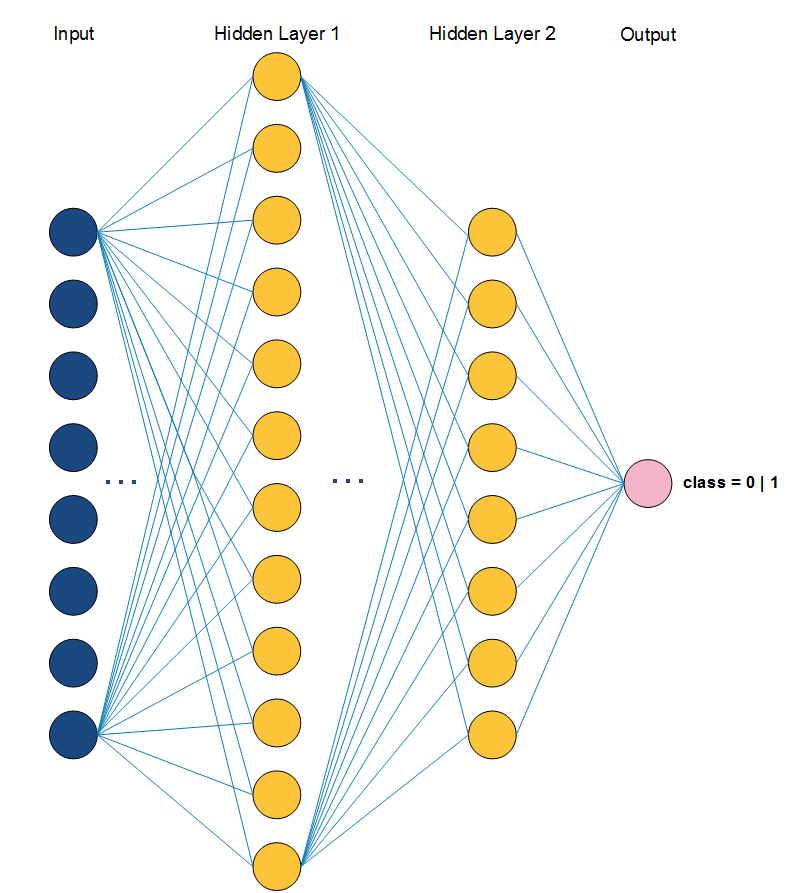

In [73]:
from IPython.display import Image
Image(filename='neural_net.png')

In [74]:
model_base = Sequential()
# input_layer_neurons=400, input_dim=130. It means 130 input parameters, with 400 neurons in the FIRST hidden layer
model_base.add(Dense(400, input_dim=X_train.shape[1], init='normal', activation='relu'))
# Normalization allows us to use much higher learning rates and be less careful about initialization.
model_base.add(Dense(1, init='normal'))
# Compile model
model_base.compile(loss='mse', optimizer='adam')

In [75]:
model_base.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 400)               52400     
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 401       
Total params: 52,801
Trainable params: 52,801
Non-trainable params: 0
_________________________________________________________________


In [76]:
history = model_base.fit(X_train, y_train, epochs=15, batch_size=10, validation_data=(X_test, y_test), verbose=2, shuffle=False)

Train on 150654 samples, validate on 37664 samples
Epoch 1/15
 - 9s - loss: 5339741.4166 - val_loss: 5115640.3898
Epoch 2/15
 - 10s - loss: 4372141.9870 - val_loss: 4892280.5846
Epoch 3/15
 - 10s - loss: 4240871.3688 - val_loss: 4781870.0386
Epoch 4/15
 - 10s - loss: 4164641.2719 - val_loss: 4715461.3835
Epoch 5/15
 - 10s - loss: 4111553.9681 - val_loss: 4669537.5802
Epoch 6/15
 - 10s - loss: 4071707.2421 - val_loss: 4636670.9728
Epoch 7/15
 - 9s - loss: 4039665.6915 - val_loss: 4611832.3151
Epoch 8/15
 - 10s - loss: 4014220.6145 - val_loss: 4583465.2010
Epoch 9/15
 - 10s - loss: 3992707.0088 - val_loss: 4567954.0022
Epoch 10/15
 - 10s - loss: 3974279.1819 - val_loss: 4552984.5480
Epoch 11/15
 - 10s - loss: 3958558.1096 - val_loss: 4546773.4608
Epoch 12/15
 - 10s - loss: 3943913.5451 - val_loss: 4531037.6625
Epoch 13/15
 - 11s - loss: 3931239.3135 - val_loss: 4527856.8726
Epoch 14/15
 - 11s - loss: 3918821.0331 - val_loss: 4513333.2635
Epoch 15/15
 - 10s - loss: 3907844.6134 - val_loss

In [77]:
y_pred_base = model_base.predict(X_test,verbose=1)

37664/37664 [==============================] - 0s 9us/step


In [78]:
mse_base = mean_squared_error(y_test, y_pred_base)
mae_base = mean_absolute_error(y_test, y_pred_base)
rmse_base = mean_squared_error(y_test, y_pred_base)**0.5
r2_base = r2_score(y_test, y_pred_base)

In [79]:
print('MSE    : %0.4f ' % mse_base)
print('MAE    : %0.4f ' % mae_base)
print('RMSE   : %0.4f ' % rmse_base)
print('R2     : %0.4f ' % r2_base)

MSE    : 4509857.7218 
MAE    : 1432.8051 
RMSE   : 2123.6426 
R2     : 0.4755 


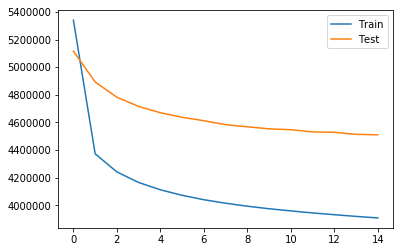

In [80]:
# plotting results
plt.plot(history.history['loss'], label='Train')
plt.plot(history.history['val_loss'], label='Test')
plt.legend()
plt.show()

### 5b) Simpler model

with few updates from previous baseline model

In [81]:
# Build model
model_simple = Sequential()
# create dense layer with half of baseline model i.e 400/2
model_simple.add(Dense(200, input_dim=X_train.shape[1], init='normal', activation='relu'))
model_simple.add(Dense(1, init='normal', activation='relu')) # adding activation to next layer as well
# Compile model
model_simple.compile(loss='mse', optimizer='adam')

In [82]:
model_simple.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 200)               26200     
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 201       
Total params: 26,401
Trainable params: 26,401
Non-trainable params: 0
_________________________________________________________________


In [83]:
history = model_simple.fit(X_train, y_train, epochs=15, batch_size=10, validation_data=(X_test, y_test), verbose=2, shuffle=False)

Train on 150654 samples, validate on 37664 samples
Epoch 1/15
 - 9s - loss: 5653254.5665 - val_loss: 5221862.1737
Epoch 2/15
 - 9s - loss: 4480571.9383 - val_loss: 4984926.2570
Epoch 3/15
 - 10s - loss: 4329724.2530 - val_loss: 4875313.4528
Epoch 4/15
 - 8s - loss: 4247018.3282 - val_loss: 4799007.2295
Epoch 5/15
 - 9s - loss: 4186290.5894 - val_loss: 4739219.2639
Epoch 6/15
 - 8s - loss: 4139269.9902 - val_loss: 4691812.4566
Epoch 7/15
 - 8s - loss: 4101491.9171 - val_loss: 4649172.9400
Epoch 8/15
 - 9s - loss: 4070786.5166 - val_loss: 4624199.7272
Epoch 9/15
 - 9s - loss: 4045809.9996 - val_loss: 4599686.7875
Epoch 10/15
 - 8s - loss: 4024378.9120 - val_loss: 4577951.2625
Epoch 11/15
 - 8s - loss: 4006366.3225 - val_loss: 4564892.5259
Epoch 12/15
 - 8s - loss: 3990305.8642 - val_loss: 4546923.6470
Epoch 13/15
 - 8s - loss: 3975523.3634 - val_loss: 4535629.9906
Epoch 14/15
 - 8s - loss: 3962742.6413 - val_loss: 4522360.4342
Epoch 15/15
 - 8s - loss: 3951495.1736 - val_loss: 4507488.12

In [84]:
y_pred_simple = model_simple.predict(X_test,verbose=1)

37664/37664 [==============================] - 0s 7us/step


In [85]:
mse_simple = mean_squared_error(y_test, y_pred_simple)
mae_simple = mean_absolute_error(y_test, y_pred_simple)
rmse_simple = mean_squared_error(y_test, y_pred_simple)**0.5
r2_simple = r2_score(y_test, y_pred_simple)

In [87]:
print('MSE    : %0.4f ' % mse_simple)
print('MAE    : %0.4f ' % mae_simple)
print('RMSE   : %0.4f ' % rmse_simple)
print('R2     : %0.4f ' % r2_simple)

MSE    : 4507488.1305 
MAE    : 1434.1996 
RMSE   : 2123.0846 
R2     : 0.4758 


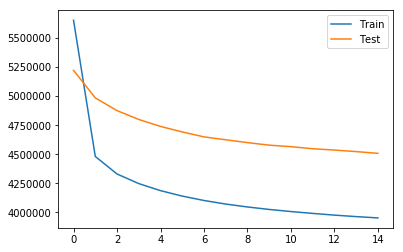

In [88]:
# plotting results
plt.plot(history.history['loss'], label='Train')
plt.plot(history.history['val_loss'], label='Test')
plt.legend()
plt.show()

### 5c)-Little deeper model

In [89]:
model_deep = Sequential()
model_deep.add(Dense(400, input_dim=X_train.shape[1], init='normal', activation='relu'))
# add more dense layer with half of original one
model_deep.add(Dense(200, init='normal', activation='relu'))
model_deep.add(Dense(1, init='normal', activation='relu'))
# Compile model
model_deep.compile(loss='mse', optimizer='adam')

In [90]:
model_deep.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 400)               52400     
_________________________________________________________________
dense_10 (Dense)             (None, 200)               80200     
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 201       
Total params: 132,801
Trainable params: 132,801
Non-trainable params: 0
_________________________________________________________________


In [91]:
history = model_deep.fit(X_train, y_train, epochs=15, batch_size=10, validation_data=(X_test, y_test), verbose=2, shuffle=False)

Train on 150654 samples, validate on 37664 samples
Epoch 1/15
 - 17s - loss: 4647232.1531 - val_loss: 4917241.1322
Epoch 2/15
 - 20s - loss: 4199773.4802 - val_loss: 4419586.9328
Epoch 3/15
 - 17s - loss: 4108982.9480 - val_loss: 4244172.6472
Epoch 4/15
 - 16s - loss: 4053458.8777 - val_loss: 4180830.9660
Epoch 5/15
 - 16s - loss: 4015560.9821 - val_loss: 4150305.8185
Epoch 6/15
 - 16s - loss: 3989919.3656 - val_loss: 4166035.4906
Epoch 7/15
 - 17s - loss: 3961463.4259 - val_loss: 4146555.6259
Epoch 8/15
 - 16s - loss: 3940461.3753 - val_loss: 4177593.4879
Epoch 9/15
 - 16s - loss: 3919135.2964 - val_loss: 4204869.5634
Epoch 10/15
 - 18s - loss: 3903506.8064 - val_loss: 4177812.3364
Epoch 11/15
 - 18s - loss: 3887421.7157 - val_loss: 4233006.0562
Epoch 12/15
 - 16s - loss: 3874513.1158 - val_loss: 4241504.4471
Epoch 13/15
 - 16s - loss: 3864873.2137 - val_loss: 4287581.2709
Epoch 14/15
 - 17s - loss: 3851467.4371 - val_loss: 4276195.5237
Epoch 15/15
 - 18s - loss: 3841249.1666 - val_lo

In [92]:
y_pred_deep = model_deep.predict(X_test,verbose=1)

37664/37664 [==============================] - 1s 14us/step


In [93]:
mse_deep = mean_squared_error(y_test, y_pred_deep)
mae_deep = mean_absolute_error(y_test, y_pred_deep)
rmse_deep = mean_squared_error(y_test, y_pred_deep)**0.5
r2_deep = r2_score(y_test, y_pred_deep)

In [94]:
print('MSE    : %0.4f ' % mse_deep)
print('MAE    : %0.4f ' % mae_deep)
print('RMSE   : %0.4f ' % rmse_deep)
print('R2     : %0.4f ' % r2_deep)

MSE    : 4196390.8592 
MAE    : 1338.3838 
RMSE   : 2048.5094 
R2     : 0.5120 


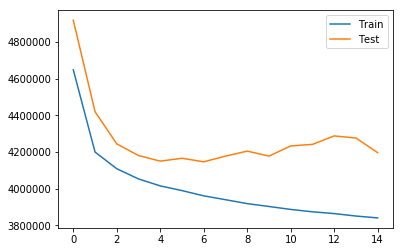

In [95]:
# plotting results
plt.plot(history.history['loss'], label='Train')
plt.plot(history.history['val_loss'], label='Test')
plt.legend()
plt.show()

### 5d)-Optimize model using dropout

This reduces overfitting

In [96]:
from keras.optimizers import SGD
from keras.layers import Dropout
from keras.constraints import maxnorm

In [97]:
model_dropout = Sequential()
model_dropout.add(Dense(400, input_dim=X_train.shape[1], init='normal', activation='relu',W_constraint=maxnorm(3)))
# to reduce overfitting
model_dropout.add(Dropout(0.2))
# second stage of layer
model_dropout.add(Dense(200, init='normal', activation='relu', W_constraint=maxnorm(3)))
model_dropout.add(Dropout(0.2))
# final layer
model_dropout.add(Dense(1, init='normal', activation='relu'))
# Compile model
sgd = SGD(lr=0.1,momentum=0.9,decay=0.0,nesterov=False)
model_dropout.compile(loss='mse', optimizer=sgd)
model_dropout.summary()

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             (None, 400)               52400     
_________________________________________________________________
dropout_1 (Dropout)          (None, 400)               0         
_________________________________________________________________
dense_13 (Dense)             (None, 200)               80200     
_________________________________________________________________
dropout_2 (Dropout)          (None, 200)               0         
_________________________________________________________________
dense_14 (Dense)             (None, 1)                 201       
Total params: 132,801
Trainable params: 132,801
Non-trainable params: 0
_________________________________________________________________


In [98]:
history = model_dropout.fit(X_train, y_train, epochs=15, batch_size=10, validation_data=(X_test, y_test), verbose=2, shuffle=False)

Train on 150654 samples, validate on 37664 samples
Epoch 1/15
 - 18s - loss: 72530598598946.1406 - val_loss: 17851319.5299
Epoch 2/15
 - 18s - loss: 17611034.4837 - val_loss: 17851319.5299
Epoch 3/15
 - 19s - loss: 17611034.4837 - val_loss: 17851319.5299
Epoch 4/15
 - 17s - loss: 17611034.4837 - val_loss: 17851319.5299
Epoch 5/15
 - 18s - loss: 17611034.4837 - val_loss: 17851319.5299
Epoch 6/15
 - 18s - loss: 17611034.4837 - val_loss: 17851319.5299
Epoch 7/15
 - 18s - loss: 17611034.4837 - val_loss: 17851319.5299
Epoch 8/15
 - 18s - loss: 17611034.4837 - val_loss: 17851319.5299
Epoch 9/15
 - 18s - loss: 17611034.4837 - val_loss: 17851319.5299
Epoch 10/15
 - 17s - loss: 17611034.4837 - val_loss: 17851319.5299
Epoch 11/15
 - 19s - loss: 17611034.4837 - val_loss: 17851319.5299
Epoch 12/15
 - 18s - loss: 17611034.4837 - val_loss: 17851319.5299
Epoch 13/15
 - 18s - loss: 17611034.4837 - val_loss: 17851319.5299
Epoch 14/15
 - 18s - loss: 17611034.4837 - val_loss: 17851319.5299
Epoch 15/15
 -

In [99]:
y_pred_dropout = model_dropout.predict(X_test,verbose=1)

37664/37664 [==============================] - 1s 16us/step


In [100]:
mse_dropout = mean_squared_error(y_test, y_pred_dropout)
mae_dropout = mean_absolute_error(y_test, y_pred_dropout)
rmse_dropout = mean_squared_error(y_test, y_pred_dropout)**0.5
r2_dropout = r2_score(y_test, y_pred_dropout)

In [101]:
print('MSE    : %0.4f ' % mse_dropout)
print('MAE    : %0.4f ' % mae_dropout)
print('RMSE   : %0.4f ' % rmse_dropout)
print('R2     : %0.4f ' % r2_dropout)

MSE    : 17851319.5667 
MAE    : 3041.8075 
RMSE   : 4225.0822 
R2     : -1.0760 


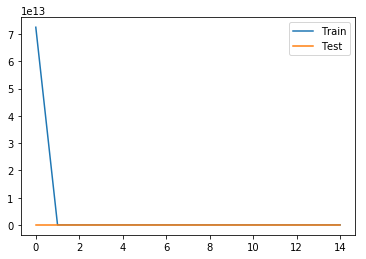

In [102]:
# plotting results
plt.plot(history.history['loss'], label='Train')
plt.plot(history.history['val_loss'], label='Test')
plt.legend()
plt.show()

### 5e)-Model with decay

In [103]:
model_decay = Sequential()
model_decay.add(Dense(400, input_dim=X_train.shape[1], init='normal', activation='relu'))
model_decay.add(Dense(1, init='normal', activation='relu'))
# Compile model
sgd = SGD(lr=0.1,momentum=0.8,decay=0.01,nesterov=False)
model_decay.compile(loss='mse', optimizer=sgd)
model_decay.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_15 (Dense)             (None, 400)               52400     
_________________________________________________________________
dense_16 (Dense)             (None, 1)                 401       
Total params: 52,801
Trainable params: 52,801
Non-trainable params: 0
_________________________________________________________________


In [104]:
history = model_decay.fit(X_train, y_train, epochs=15, batch_size=10, validation_data=(X_test, y_test), verbose=2, shuffle=False)

Train on 150654 samples, validate on 37664 samples
Epoch 1/15
 - 9s - loss: 223554263307093.7500 - val_loss: 17851319.5299
Epoch 2/15
 - 9s - loss: 17611034.4837 - val_loss: 17851319.5299
Epoch 3/15
 - 9s - loss: 17611034.4837 - val_loss: 17851319.5299
Epoch 4/15
 - 9s - loss: 17611034.4837 - val_loss: 17851319.5299
Epoch 5/15
 - 9s - loss: 17611034.4837 - val_loss: 17851319.5299
Epoch 6/15
 - 9s - loss: 17611034.4837 - val_loss: 17851319.5299
Epoch 7/15
 - 9s - loss: 17611034.4837 - val_loss: 17851319.5299
Epoch 8/15
 - 9s - loss: 17611034.4837 - val_loss: 17851319.5299
Epoch 9/15
 - 9s - loss: 17611034.4837 - val_loss: 17851319.5299
Epoch 10/15
 - 9s - loss: 17611034.4837 - val_loss: 17851319.5299
Epoch 11/15
 - 9s - loss: 17611034.4837 - val_loss: 17851319.5299
Epoch 12/15
 - 9s - loss: 17611034.4837 - val_loss: 17851319.5299
Epoch 13/15
 - 9s - loss: 17611034.4837 - val_loss: 17851319.5299
Epoch 14/15
 - 9s - loss: 17611034.4837 - val_loss: 17851319.5299
Epoch 15/15
 - 9s - loss: 1

In [106]:
y_pred_decay = model_decay.predict(X_test,verbose=1)

37664/37664 [==============================] - 0s 11us/step


In [107]:
mse_decay = mean_squared_error(y_test, y_pred_decay)
mae_decay = mean_absolute_error(y_test, y_pred_decay)
rmse_decay = mean_squared_error(y_test, y_pred_decay)**0.5
r2_decay = r2_score(y_test, y_pred_decay)

In [108]:
print('MSE    : %0.4f ' % mse_decay)
print('MAE    : %0.4f ' % mae_decay)
print('RMSE   : %0.4f ' % rmse_decay)
print('R2     : %0.4f ' % r2_decay)

MSE    : 17851319.5667 
MAE    : 3041.8075 
RMSE   : 4225.0822 
R2     : -1.0760 


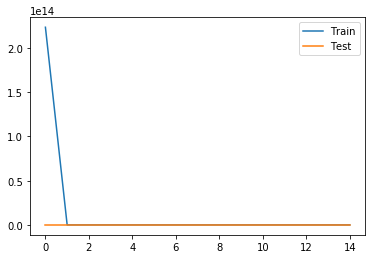

In [109]:
# plotting results
plt.plot(history.history['loss'], label='Train')
plt.plot(history.history['val_loss'], label='Test')
plt.legend()
plt.show()

### 5f)-Dense neural net using PReLU
Parametric Rectified Linear Unit

For better and more consistent results

In [110]:
from keras.layers import Dense, Dropout, Activation
from keras.layers.advanced_activations import PReLU
model_dense = Sequential()
# as first layer in a sequential model:
#Initializations define the way to set the initial random weights of Keras layers
model_dense.add(Dense(400, input_dim = X_train.shape[1], init = 'he_normal')) 
#he_normal initialization works better for layers with ReLu activation.
model_dense.add(PReLU()) # Parametric Rectified Linear Unit (PReLU)
model_dense.add(Dropout(0.4))
# after the first layer, you don't need to specify the size of the input anymore:
model_dense.add(Dense(200, init = 'he_normal'))
model_dense.add(PReLU())
model_dense.add(Dropout(0.2))
model_dense.add(Dense(1, init = 'he_normal'))
model_dense.compile(loss = 'mse', optimizer = 'adadelta')# Adadelta is an extension of Adagrad

In [111]:
model_dense.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_17 (Dense)             (None, 400)               52400     
_________________________________________________________________
p_re_lu_1 (PReLU)            (None, 400)               400       
_________________________________________________________________
dropout_3 (Dropout)          (None, 400)               0         
_________________________________________________________________
dense_18 (Dense)             (None, 200)               80200     
_________________________________________________________________
p_re_lu_2 (PReLU)            (None, 200)               200       
_________________________________________________________________
dropout_4 (Dropout)          (None, 200)               0         
_________________________________________________________________
dense_19 (Dense)             (None, 1)                 201       
Total para

In [112]:
history = model_dense.fit(X_train, y_train, epochs=15, batch_size=10, validation_data=(X_test, y_test), verbose=2, shuffle=False)

Train on 150654 samples, validate on 37664 samples
Epoch 1/15
 - 21s - loss: 4977672.1502 - val_loss: 4512136.3196
Epoch 2/15
 - 23s - loss: 4460538.2845 - val_loss: 4384069.3391
Epoch 3/15
 - 22s - loss: 4368183.5225 - val_loss: 4325205.5902
Epoch 4/15
 - 21s - loss: 4338394.2974 - val_loss: 4297075.2960
Epoch 5/15
 - 22s - loss: 4292507.4096 - val_loss: 4270868.9747
Epoch 6/15
 - 21s - loss: 4268974.8593 - val_loss: 4281080.6661
Epoch 7/15
 - 22s - loss: 4263028.0523 - val_loss: 4262225.7155
Epoch 8/15
 - 21s - loss: 4248714.3042 - val_loss: 4244718.6837
Epoch 9/15
 - 21s - loss: 4232497.4912 - val_loss: 4261431.5598
Epoch 10/15
 - 22s - loss: 4239812.4165 - val_loss: 4289850.3326
Epoch 11/15
 - 22s - loss: 4229095.4531 - val_loss: 4267942.1264
Epoch 12/15
 - 21s - loss: 4224088.6248 - val_loss: 4269483.1849
Epoch 13/15
 - 22s - loss: 4207109.2035 - val_loss: 4330251.4649
Epoch 14/15
 - 21s - loss: 4205472.2537 - val_loss: 4335183.1928
Epoch 15/15
 - 21s - loss: 4205742.0146 - val_lo

In [113]:
y_pred_dense = model_dense.predict(X_test,verbose=1)

37664/37664 [==============================] - 1s 18us/step


In [114]:
mse_dense = mean_squared_error(y_test, y_pred_dense)
mae_dense = mean_absolute_error(y_test, y_pred_dense)
rmse_dense = mean_squared_error(y_test, y_pred_dense)**0.5
r2_dense = r2_score(y_test, y_pred_dense)

In [115]:
print('MSE    : %0.4f ' % mse_dense)
print('MAE    : %0.4f ' % mae_dense)
print('RMSE   : %0.4f ' % rmse_dense)
print('R2     : %0.4f ' % r2_dense)

MSE    : 4371302.9427 
MAE    : 1229.5182 
RMSE   : 2090.7661 
R2     : 0.4916 


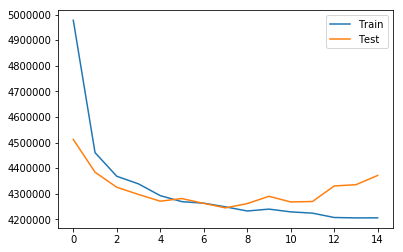

In [116]:
plt.plot(history.history['loss'], label='Train')
plt.plot(history.history['val_loss'], label='Test')
plt.legend()
plt.show()

# 5)- Buidling LSTM Model

### 5a)-Reshaping input for lstm model

In [117]:
print(X_train.shape)
print(X_test.shape)

(150654, 130)
(37664, 130)


In [118]:
# reshape input to be 3D [samples, timesteps, features]
X_train = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))
X_test = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))

In [119]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(150654, 1, 130)
(37664, 1, 130)
(150654,)
(37664,)


In [120]:
X_train.shape[1]

1

In [121]:
X_train.shape[2]

130

In [125]:
# network architecture
model_lstm = Sequential()
model_lstm.add(LSTM(400, input_shape=(X_train.shape[1], X_train.shape[2])))
model_lstm.add(Dense(1))
model_lstm.compile(loss='mse', optimizer='adam')

In [127]:
model_lstm.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 400)               849600    
_________________________________________________________________
dense_20 (Dense)             (None, 1)                 401       
Total params: 850,001
Trainable params: 850,001
Non-trainable params: 0
_________________________________________________________________


### 5b)-Fit model

In [128]:
history = model_lstm.fit(X_train, y_train, epochs=15, batch_size=10, validation_data=(X_test, y_test), verbose=2, shuffle=False)

Train on 150654 samples, validate on 37664 samples
Epoch 1/15
 - 286s - loss: 11073223.7009 - val_loss: 8475491.1140
Epoch 2/15
 - 278s - loss: 7285447.2603 - val_loss: 6603714.5126
Epoch 3/15
 - 271s - loss: 5892396.3925 - val_loss: 5697612.4867
Epoch 4/15
 - 277s - loss: 5270436.5604 - val_loss: 5289688.2164
Epoch 5/15
 - 289s - loss: 4979951.0380 - val_loss: 5094405.7564
Epoch 6/15
 - 292s - loss: 4773244.8640 - val_loss: 4919715.2983
Epoch 7/15
 - 288s - loss: 4649828.1955 - val_loss: 4884627.5642
Epoch 8/15
 - 256s - loss: 4573196.4542 - val_loss: 4777018.3631
Epoch 9/15
 - 282s - loss: 4500532.7743 - val_loss: 4715200.2048
Epoch 10/15
 - 290s - loss: 4439121.9958 - val_loss: 4709415.5486
Epoch 11/15
 - 292s - loss: 4412009.3733 - val_loss: 4689852.7569
Epoch 12/15
 - 275s - loss: 4369680.6128 - val_loss: 4724910.3454
Epoch 13/15
 - 269s - loss: 4361424.3630 - val_loss: 4720345.5991
Epoch 14/15
 - 284s - loss: 4321167.6140 - val_loss: 4742621.2697
Epoch 15/15
 - 276s - loss: 42995

Too long ! Is it it worth trying?

### 5c)-Evaluation

In [130]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(150654, 1, 130)
(37664, 1, 130)
(150654,)
(37664,)


In [131]:
# make a prediction
yhat = model_lstm.predict(X_test)
# Convert X_Test back to natural state 
X_test = X_test.reshape((X_test.shape[0], X_test.shape[2]))

In [132]:
X_test.shape

(37664, 130)

In [133]:
yhat[:5]

array([[5293.203 ],
       [8065.3267],
       [7870.2476],
       [7429.679 ],
       [4862.2046]], dtype=float32)

In [134]:
# invert scaling for forecast
from pandas import concat
from numpy import concatenate
inv_yhat = concatenate((yhat, X_test[:, 1:]), axis=1)
inv_yhat = scaler.inverse_transform(inv_yhat)
inv_yhat = inv_yhat[:,0]
# invert scaling for actual
y_test = y_test.reshape((len(y_test), 1))
inv_y = concatenate((y_test, X_test[:, 1:]), axis=1)
inv_y = scaler.inverse_transform(inv_y)
inv_y = inv_y[:,0]

In [135]:
# calculate Quant. of interest
from math import sqrt
from sklearn.metrics import mean_squared_log_error,mean_squared_error, r2_score,mean_absolute_error 

mse_lstm = mean_squared_error(inv_y, inv_yhat)
mae_lstm = mean_absolute_error(inv_y, inv_yhat)
rmse_lstm = sqrt(mean_squared_error(inv_y, inv_yhat))
r2_lstm = r2_score(inv_y, inv_yhat)

In [137]:
print('')
print('MSE    : %0.2f ' % mse_lstm)
print('MAE    : %0.2f ' % mae_lstm)
print('RMSE   : %0.2f ' % rmse_lstm)
print('R2     : %0.4f ' % r2_lstm)


MSE    : 4612127.54 
MAE    : 1359.09 
RMSE   : 2147.59 
R2     : 0.4636 


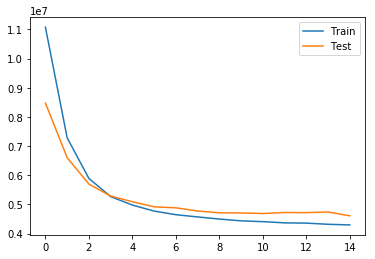

In [138]:
# Plot
plt.plot(history.history['loss'], label='Train')
plt.plot(history.history['val_loss'], label='Test')
plt.legend()
plt.show()

# 6)-Comparing RMSE of each Model

In [140]:
# Creating RMSE Dictionary
rmse_dict = {'RMSE':[rmse_base, rmse_simple, rmse_deep,rmse_dropout,rmse_decay,rmse_dense,rmse_lstm]}

In [141]:
# Creating RMSE DataFrame 
rmse_df = pd.DataFrame(data = rmse_dict, index = ['Base_NN','Simple_NN','Deep_NN','Dropout_NN','Decay_NN','Dense_NN',
                                                 'LSTM_NN'])

In [142]:
rmse_df

,RMSE
Base_NN,2123.642560
Simple_NN,2123.084579
Deep_NN,2048.509424
Dropout_NN,4225.082196
Decay_NN,4225.082196
Dense_NN,2090.766114
LSTM_NN,2147.586445


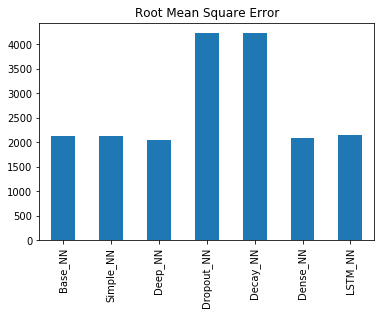

In [143]:
# Plotting RMSE 
rmse_df.plot.bar(legend = False, title = 'Root Mean Square Error')

Our neural network results are not as good as machine learning algorithms have provided. so, we shall not change our submitted results